<a href="https://colab.research.google.com/github/Andres8bit/Machine-Learning/blob/main/IMDB_movie_sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
def plot_graphs(history,metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric,'val_'+metric])

In [3]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)

train_dataset, test_dataset = dataset['train'],dataset['test']

train_dataset.element_spec

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteAGD7JX/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteAGD7JX/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteAGD7JX/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [4]:
for example, label in train_dataset.take(100):
  print('text: ',example.numpy())
  print('label: ',label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0
text:  b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. 

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [6]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [7]:
for example, label in train_dataset.take(1):
  print('texts: ',example.numpy()[:3])
  print()
  print('labels: ',label.numpy()[:3])

texts:  [b'Evidently when you offer a actor enough money they will do anything. I am not sure how much John Rys-Daves got, but most of the money he made should go to his fans as an apology for even being associated with such a ROTTEN movie. The special effects were worse then effects from the 1950\'s B movies and the acting of the rest of the cast was even worse. As to how bad the acting was a child gave the second best performance in my opinion. The English was terribly accented and I think no one could really even speak English they just memorized how the words should sound instead of memorizing the script and trying to make their character both "life-like" and real.'
 b'This film is a massive Yawn proving that Americans haven\'t got the hang of farce. Even when it has already been written for them! The original film "Hodet Over Vannet" is a witty comedy of errors that I would rate 8/10. It isn\'t just about a linguistic translation, but certain absurd chains of events are skipped en

In [8]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [9]:
vocab = np.array(encoder.get_vocabulary())
vocab[:]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but',
       'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be',
       'one', 'its', 'at', 'all', 'by', 'an', 'they', 'from', 'who', 'so',
       'like', 'her', 'just', 'or', 'about', 'has', 'if', 'out', 'some',
       'there', 'what', 'good', 'when', 'more', 'very', 'even', 'she',
       'my', 'no', 'up', 'would', 'which', 'only', 'time', 'really',
       'story', 'their', 'were', 'had', 'see', 'can', 'me', 'than', 'we',
       'much', 'well', 'been', 'get', 'will', 'into', 'also', 'because',
       'other', 'do', 'people', 'bad', 'great', 'first', 'how', 'most',
       'him', 'dont', 'made', 'then', 'movies', 'make', 'films', 'could',
       'way', 'them', 'any', 'too', 'after', 'characters', 'think',
       'watch', 'two', 'many', 'being', 'seen', 'character', 'never',
       'little', 'acting', 'where', 'plot', 'best', 'love', 'did'

In [10]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  1,  51,  23, ...,   0,   0,   0],
       [ 11,  20,   7, ...,   0,   0,   0],
       [ 10, 208,  11, ...,   0,   0,   0]])

In [11]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'Evidently when you offer a actor enough money they will do anything. I am not sure how much John Rys-Daves got, but most of the money he made should go to his fans as an apology for even being associated with such a ROTTEN movie. The special effects were worse then effects from the 1950\'s B movies and the acting of the rest of the cast was even worse. As to how bad the acting was a child gave the second best performance in my opinion. The English was terribly accented and I think no one could really even speak English they just memorized how the words should sound instead of memorizing the script and trying to make their character both "life-like" and real.'
Round-trip:  [UNK] when you [UNK] a actor enough money they will do anything i am not sure how much john [UNK] got but most of the money he made should go to his fans as an [UNK] for even being [UNK] with such a [UNK] movie the special effects were worse then effects from the [UNK] b movies and the acting of the rest 

In [12]:
model = tf.keras.Sequential([
         encoder,
         tf.keras.layers.Embedding(
             input_dim=len(encoder.get_vocabulary()),
             output_dim=64,
             # masking to handle variable sequence lengths
             mask_zero=True),
         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
         tf.keras.layers.Dense(64,activation='relu'),
         tf.keras.layers.Dense(1)
        ])


In [13]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [14]:
model.compile(  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=['accuracy']
              )


In [15]:
history = model.fit(train_dataset, epochs=10,validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 48s 87ms/step - loss: 0.6439 - accuracy: 0.5590 - val_loss: 0.4551 - val_accuracy: 0.8010
Epoch 2/10
391/391 [==============================] - 32s 81ms/step - loss: 0.3815 - accuracy: 0.8278 - val_loss: 0.3647 - val_accuracy: 0.8521
Epoch 3/10
391/391 [==============================] - 33s 83ms/step - loss: 0.3336 - accuracy: 0.8544 - val_loss: 0.3390 - val_accuracy: 0.8396
Epoch 4/10
391/391 [==============================] - 32s 80ms/step - loss: 0.3190 - accuracy: 0.8607 - val_loss: 0.3248 - val_accuracy: 0.8573
Epoch 5/10
391/391 [==============================] - 33s 82ms/step - loss: 0.3097 - accuracy: 0.8664 - val_loss: 0.3208 - val_accuracy: 0.8552
Epoch 6/10
391/391 [==============================] - 32s 81ms/step - loss: 0.3080 - accuracy: 0.8664 - val_loss: 0.3217 - val_accuracy: 0.8552
Epoch 7/10
391/391 [==============================] - 32s 80ms/step - loss: 0.3043 - accuracy: 0.8687 - val_loss: 0.3224 - val_accuracy:

In [16]:
test_loss, test_acc = model.evaluate(test_dataset)

print('test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 16s 41ms/step - loss: 0.3270 - accuracy: 0.8546
test Loss: 0.327016681432724
Test Accuracy: 0.854640007019043


(0.0, 0.6612026140093803)

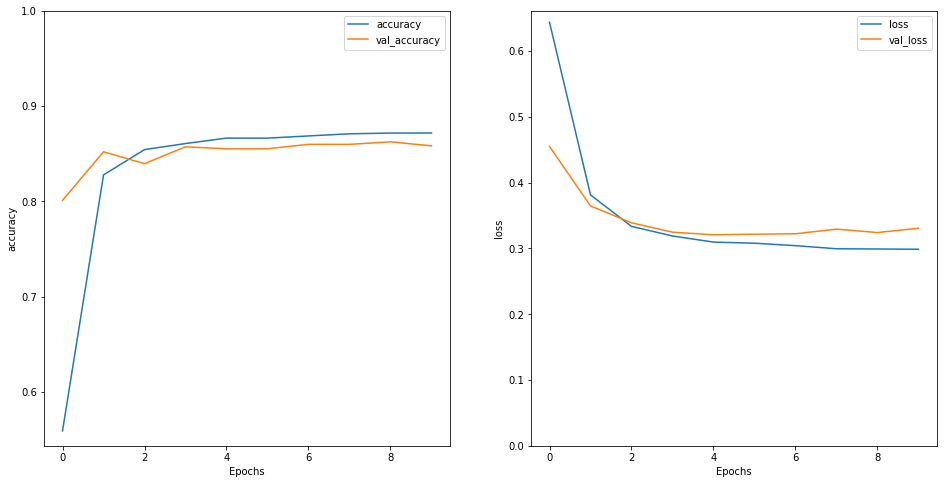

In [17]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history,'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history,'loss')
plt.ylim(0,None)

In [18]:
model = tf.keras.Sequential([
          encoder,
          tf.keras.layers.Embedding(len(encoder.get_vocabulary()),64,mask_zero=True),
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
          tf.keras.layers.Dense(64,activation='relu'),
          tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(1)             
])

In [19]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])


In [20]:
history = model.fit(train_dataset,epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30
                    )

Epoch 1/10
391/391 [==============================] - 73s 146ms/step - loss: 0.6182 - accuracy: 0.5862 - val_loss: 0.4296 - val_accuracy: 0.8099
Epoch 2/10
391/391 [==============================] - 55s 139ms/step - loss: 0.4018 - accuracy: 0.8266 - val_loss: 0.3528 - val_accuracy: 0.8464
Epoch 3/10
391/391 [==============================] - 54s 137ms/step - loss: 0.3443 - accuracy: 0.8533 - val_loss: 0.3540 - val_accuracy: 0.8531
Epoch 4/10
391/391 [==============================] - 54s 138ms/step - loss: 0.3263 - accuracy: 0.8626 - val_loss: 0.3362 - val_accuracy: 0.8365
Epoch 5/10
391/391 [==============================] - 54s 138ms/step - loss: 0.3178 - accuracy: 0.8653 - val_loss: 0.3209 - val_accuracy: 0.8589
Epoch 6/10
391/391 [==============================] - 55s 139ms/step - loss: 0.3095 - accuracy: 0.8701 - val_loss: 0.3229 - val_accuracy: 0.8526
Epoch 7/10
391/391 [==============================] - 56s 141ms/step - loss: 0.3035 - accuracy: 0.8718 - val_loss: 0.3206 - val_ac